<a href="https://colab.research.google.com/github/chandanahn541/Object-detection/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1:SETUP AND IMAGE DETECTION GOAL:set up YOLO and detct objects in a single image
* install and import YOLO(ultratics YOLOM)
* load pretrained model
*  run interface on image
*  Deploy results





In [12]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

In [13]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

In [14]:
uploaded=files.upload()
file_name=list(uploaded.keys())[0]
print("uploaded",file_name)

Saving istockphoto-1480574526-612x612.jpg to istockphoto-1480574526-612x612.jpg
uploaded istockphoto-1480574526-612x612.jpg


In [15]:
model=YOLO('yolov8n.pt')

In [16]:
results=model(file_name)
annotated=results[0].plot()


image 1/1 /content/istockphoto-1480574526-612x612.jpg: 448x640 14 persons, 84.3ms
Speed: 7.6ms preprocess, 84.3ms inference, 101.1ms postprocess per image at shape (1, 3, 448, 640)


(-0.5, 611.5, 407.5, -0.5)

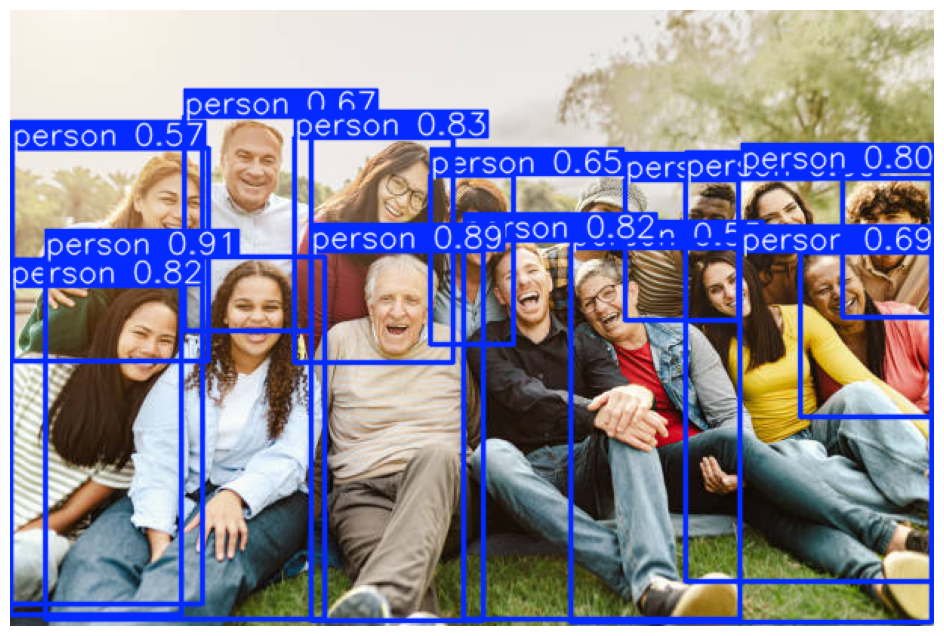

In [17]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')

Day2:OBJECT DECTION
Goal:Use YOLOmto detect object in video frames


*   load and process video file frame by frame
*   Save output video with bounding box



In [20]:
uploaded=files.upload()
video_path=list(uploaded.keys())[0]
print("uploaded",video_path)

Saving 133501-756991137_tiny.mp4 to 133501-756991137_tiny.mp4
uploaded 133501-756991137_tiny.mp4


In [21]:
output_path="output_detected.mp4" # Added .mp4 extension
cap=cv2.VideoCapture(video_path)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=int(cap.get(cv2.CAP_PROP_FPS))or 25.0
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

frame_count=0
while True:
    ret,frame=cap.read()
    if not ret:
        break
    results=model(frame)
    annotated=results[0].plot()
    out.write(annotated)
    frame_count+=1
    if frame_count%100==0:
        print(f"Processed {frame_count} frames")
cap.release()
out.release()

print(f"Video saved to {output_path}")
files.download(output_path)


0: 384x640 1 book, 49.1ms
Speed: 2.3ms preprocess, 49.1ms inference, 54.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.3ms
Speed: 1.8ms preprocess, 6.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 book, 6.0ms
Speed: 1.6ms preprocess, 6.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 book, 6.0ms
Speed: 2.2ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 laptop, 1 book, 6.0ms
Speed: 1.9ms preprocess, 6.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.9ms
Speed: 1.8ms preprocess, 5.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.1ms
Speed: 1.8ms preprocess, 6.1ms inference, 0.5ms postprocess per image a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Day 3:Live Webcam Dection
1.   USe openCv webcam detection
2.Display detection in real-time window



⚠️ Webcam not accessible, falling back to upload.


Saving download.jpg to download.jpg
✅ Uploaded image: download.jpg

image 1/1 /content/download.jpg: 448x640 1 person, 1 cell phone, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


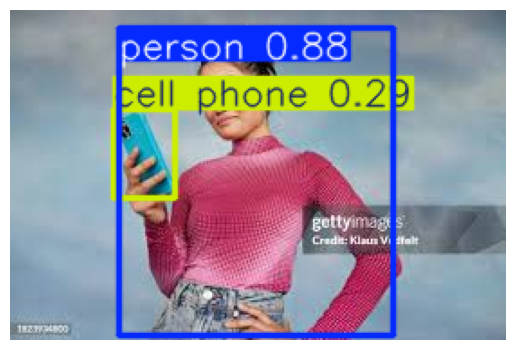

In [22]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files, output
from base64 import b64decode

# Load YOLO model
model = YOLO('yolov8n.pt')

# Webcam capture function
def take_photo(filename='snapshot.jpg'):
    js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
      div.remove();
      return imgData;
    }
    takePhoto();
    """
    try:
        data = output.eval_js(js)
        with open(filename, 'wb') as f:
            f.write(b64decode(data))
        print("✅ Captured image from webcam")
        return filename
    except Exception as e:
        print("⚠️ Webcam not accessible, falling back to upload.")
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        print("✅ Uploaded image:", filename)
        return filename

# ---- Capture or Upload ----
filename = take_photo('snapshot.jpg')

# ---- Run YOLO ----
results = model(filename)
annotated = results[0].plot()

# ---- Display results ----
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Day4:Mini YOLO training
Goal: Train YOLO on a small dataset.

Use sample COCO dataset subset or your own dataset
Train for few epochs and evaluate

In [30]:
!pip install ultralytics
from ultralytics import YOLO

In [38]:
model=YOLO('yolov8n.pt')

In [39]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  10.9M      0 --:--:-- --:--:-- --:--:-- 10.9M
replace dataset/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
data.yaml  images  labels  LICENSE  README.txt


In [44]:
%%writefile dataset/coco128.yaml
path: dataset/coco128
train: images/train2017
val: images/train2017

nc: 80
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

Writing dataset/coco128.yaml


In [47]:
model = YOLO("yolov8n.pt")
model.train(

    data="/content/dataset/coco128.yaml",

    epochs=10,
    imgsz=640,
    project="YOLO_Training",
    name="yolov8n_custom"
)

New https://pypi.org/project/ultralytics/8.3.199 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/coco128.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_Training, name=yolov8n_custom7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

RuntimeError: Dataset '/content/dataset/coco128.yaml' error ❌ 
Dataset '/content/dataset/coco128.yaml' images not found ⚠️, missing path '/content/datasets/dataset/coco128/images/train2017'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
result=model.predict("",save=True)
results[0].show()

Day 5: Build a Simple Streamlit App
Goal: Deploy YOLO model with a Streamlit UI.

Upload image or video
Display detection result

In [48]:
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

In [54]:
%%writefile app_streamlit.py
import streamlit as st
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2, tempfile, os, glob
import pandas as pd
from pathlib import Path

st.set_page_config(page_title="Object Detection ", layout="wide")
background_url = ""


st.markdown(
    f"""

    """,
    unsafe_allow_html=True
)

st.title("Object Detection ")

uploaded_weights = st.sidebar.file_uploader("Upload custom .pt weights (optional)", type=["pt"])
conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1280], index=2)

@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
    return YOLO(weights_path)

def save_uploaded_file(uploaded_file, suffix=""):
    suffix = suffix if suffix else Path(uploaded_file.name).suffix
    tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
    tf.write(uploaded_file.getbuffer())
    tf.flush()
    return tf.name

def annotate_and_table(results, model):
    res = results[0]
    try:
        plotted = res.plot()
        annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
    except Exception:
        annotated = res.orig_img if hasattr(res, "orig_img") else None

    detections = []
    try:
        boxes = res.boxes
        if boxes is not None and len(boxes) > 0:
            for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):
                name = model.names[int(c)]
                detections.append({"class": name, "conf": float(cf), "bbox": [float(x) for x in box]})
    except:
        detections = []

    return annotated, pd.DataFrame(detections)

weights_to_load = "yolov8n.pt"
if uploaded_weights:
    weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
    st.sidebar.success("Using uploaded weights")

model = load_model(weights_to_load)

mode = st.radio("Select input", ["Image upload", "Video upload"])

if mode == "Image upload":
    uploaded = st.file_uploader("Upload image", type=["jpg","jpeg","png"])
    if uploaded:
        img = Image.open(uploaded).convert("RGB")
        st.image(img, caption="Input image")
        results = model.predict(np.array(img), conf=conf, imgsz=img_size)
        annotated, df = annotate_and_table(results, model)
        if annotated is not None:
            st.image(annotated, caption="Annotated")
        if not df.empty:
            st.dataframe(df)

elif mode == "Video upload":
    uploaded_vid = st.file_uploader("Upload video", type=["mp4","mov","avi","mkv"])
    if uploaded_vid:
        tmp = save_uploaded_file(uploaded_vid)
        st.video(tmp)
        project_dir = tempfile.mkdtemp()
        results = model.predict(source=tmp, conf=conf, imgsz=img_size, project=project_dir, name="run", save=True)
        try:
            out_dir = str(results[0].save_dir)
            vids = glob.glob(os.path.join(out_dir, "*"))
            vids = [v for v in vids if Path(v).suffix.lower() in [".mp4",".avi",".mov",".mkv"]]
            if vids:
                st.success("Annotated video")
                st.video(vids[0])
        except:
            st.warning("Could not display annotated video")

Overwriting app_streamlit.py


In [56]:
from pyngrok import ngrok


NGROK_AUTH_TOKEN = "32hBJZLtaorGs3ZhUZKqe3kMVHY_2Y3BtLyePWER9eAC3ePuS" #unique for everyone
ngrok.set_auth_token(NGROK_AUTH_TOKEN)


public_url = ngrok.connect(8501)
print("Public URL:", public_url)


!streamlit run app_streamlit.py --server.port 8501 &

import time
while True:
    time.sleep(60)

Public URL: NgrokTunnel: "https://69b67e0487ae.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.197.103.194:8501



  Stopping...


KeyboardInterrupt: 